## Guassians and its vector fields 

In this blog, we will see what does gaussian data looks like and we also calculates its vector fields wrt to data. 

let our data be defined by the following function 

$$
P_{data} = \frac{1}{5} N((-5, -5), I) + \frac{4}{5} N((5, 5), I) 
$$

this is a multivariate distribution defined in 2 Dimension. the center of the first one is at (-5, -5) and other one is at (5, 5) (center means mean). the standard deviation is an identity function.

In [35]:
import torch

from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

$$
p(x, y) = \frac{1}{2\pi\sigma^2} \exp\left(-\frac{(x-\mu_x)^2 + (y-\mu_y)^2}{2\sigma^2}\right)
$$

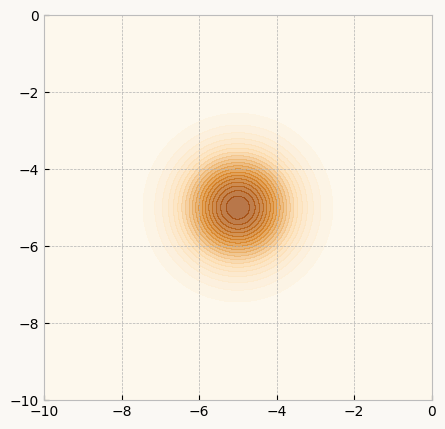

In [36]:
def gaussian_2d(x, y, mean, std):
    return torch.exp(-((x - mean[0]) ** 2 + (y - mean[1]) ** 2) / (2 * std ** 2)) / (2 * torch.pi * std ** 2)

mean = torch.tensor([-5, -5])
std = torch.tensor([1.0])
x = torch.linspace(-10, 0, 100)
y = torch.linspace(-10, 0, 100)
X, Y = torch.meshgrid(x, y)
Z = gaussian_2d(X, Y, mean, std)
colors = [(1, 0.98, 0.94), (0.99, 0.85, 0.65), (0.85, 0.5, 0.1), (0.6, 0.24, 0)]
cmap_name = 'cream_orange'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

plt.figure(figsize=(5, 5), facecolor='#FAF8F4')
ax = plt.axes()
ax.set_facecolor('#FAF8F4')

# Plot the density as a color map
plt.contourf(X.numpy(), Y.numpy(), Z.numpy(), cmap=cm, alpha=0.7, levels=20)
plt.show()

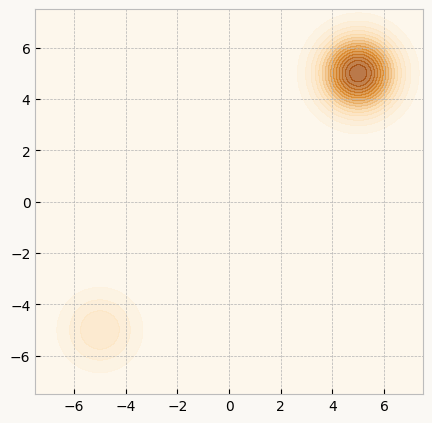

In [37]:
## Lets add two gaussians 

mean_1 = torch.tensor([-5, -5])
std_1 = torch.tensor([1.0])
mean_2 = torch.tensor([5, 5])
std_2 = torch.tensor([1.0])
x = torch.linspace(-7.5, 7.5, 100)
y = torch.linspace(-7.5, 7.5, 100)
X, Y = torch.meshgrid(x, y)
Z = (1/5)*(gaussian_2d(X, Y, mean_1, std_1)) + (4/5)*(gaussian_2d(X, Y, mean_2, std_2))

plt.figure(figsize=(5, 5), facecolor='#FAF8F4')
ax = plt.axes()
ax.set_facecolor('#FAF8F4')

# Plot the density as a color map
plt.contourf(X.numpy(), Y.numpy(), Z.numpy(), cmap=cm, alpha=0.7, levels=20)
plt.show()

## score function 

the score function of any probability density function is defined as follows
$$
\nabla \log p(x) = \frac{\nabla p(x)}{p(x)}
$$

in our case we have mixture of guassians write 

so we can write $p(x)$ as 

$$
p(x) = \sum_i w_i p_i(x)
$$

Also we can write $\nabla p(x)$ as 

$$
\nabla p(x) = \sum_i w_i \nabla p_i(x)
$$

For each component, we know:
$$
\nabla p_i(x) = p_i(x) \nabla \log p_i(x)
$$

Substituting this back:
$$
\nabla p(x) = \sum_i w_i p_i(x) \nabla \log p_i(x)
$$

finally we have 

$$
\nabla \log p(x) = \frac{\sum_i w_i p_i(x) \nabla \log p_i(x)}{\sum_i w_i p_i(x)}
$$



## calculating the score function for a guassian distribution 


- taking the natural log on both sides
$$
\log p(x, y) = -\log(2\pi\sigma^2) - \frac{(x-\mu_x)^2 + (y-\mu_y)^2}{2\sigma^2}
$$

- score function is the gradient of the log probability
$$
\nabla \log p(x, y) = \left(\frac{\partial \log p}{\partial x}, \frac{\partial \log p}{\partial y}\right)
$$

- computing the partial derivative
$$
\frac{\partial \log p}{\partial x} = -\frac{1}{2\sigma^2} \cdot 2(x-\mu_x) = -\frac{x-\mu_x}{\sigma^2}
$$

$$
\frac{\partial \log p}{\partial y} = -\frac{1}{2\sigma^2} \cdot 2(y-\mu_y) = -\frac{y-\mu_y}{\sigma^2}
$$

- final score function

$$
\nabla \log p(x, y) = \left(-\frac{x-\mu_x}{\sigma^2}, -\frac{y-\mu_y}{\sigma^2}\right)
$$


In [52]:
def score_x(x, y, mean, std):
    return -1 * ((x-mean[0])/(std**2)) 

def score_y(x, y, mean, std):
    return -1 * ((y-mean[1])/(std**2)) 


mean_1 = torch.tensor([-5, -5])
std_1 = torch.tensor([1.0])
mean_2 = torch.tensor([5, 5])
std_2 = torch.tensor([1.0])
x = torch.linspace(-10, 10, 20)
y = torch.linspace(-10, 10, 20)
X1, Y1 = torch.meshgrid(x, y)


weight_1 = 0.2  # Your 1/5
weight_2 = 0.8  # Your 4/5

# Calculate PDFs of each component
pdf_1 = gaussian_2d(X1, Y1, mean_1, std_1) + 1e-10
pdf_2 = gaussian_2d(X1, Y1, mean_2, std_2) + 1e-10

# Weighted sum of PDFs (denominator)
denominator = (weight_1 * pdf_1 + weight_2 * pdf_2)

numerator_x = weight_1 * pdf_1 * score_x(X1, Y1, mean_1, std_1) + weight_2 * pdf_2 * score_x(X1, Y1, mean_2, std_2)
numerator_y = weight_1 * pdf_1 * score_y(X1, Y1, mean_1, std_1) + weight_2 * pdf_2 * score_y(X1, Y1, mean_2, std_2)

# Final score
dx = numerator_x / (denominator)
dy = numerator_y / (denominator)


dx.max(), dy.max(), dx.min(), dy.min()

(tensor(13.), tensor(13.), tensor(-7.), tensor(-7.))

In [53]:
dx[0][0], dy[0][0], dx[7][7], dy[7][7]

(tensor(12.9648), tensor(12.9648), tensor(-2.3684), tensor(-2.3684))

In [54]:
#norm = max(dx.max(), dy.max())
norm = torch.sqrt(dx**2 + dy**2).mean()
dx = dx/norm
dy = dy/norm


In [55]:
dx[0][0], dy[0][0]

(tensor(1.9618), tensor(1.9618))

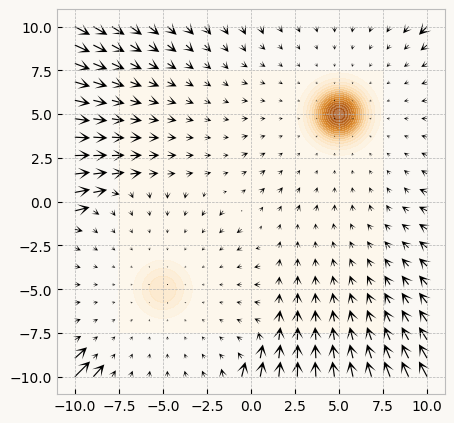

In [56]:
# Create a figure with two subplots
colors = [(1, 0.98, 0.94), (0.99, 0.85, 0.65), (0.85, 0.5, 0.1), (0.6, 0.24, 0)]
cmap_name = 'cream_orange'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

plt.figure(figsize=(5, 5), facecolor='#FAF8F4')
ax = plt.axes()
ax.set_facecolor('#FAF8F4')

# Plot the density as a color map
plt.contourf(X.numpy(), Y.numpy(), Z.numpy(), cmap=cm, alpha=0.7, levels=20)
plt.quiver(X1.numpy(), Y1.numpy(), dx.numpy(), dy.numpy(),
           color='black', 
           scale=50,  # Adjust this value to change arrow length
           width=0.003,  # Arrow width
           headwidth=10,  # Head width relative to shaft width
           headlength=10,  # Head length relative to shaft width
           headaxislength=4.5)  # Head length at shaft intersection


plt.show()